# An R tutorial on confidence intervals with plots

Here is a *population* of values.  In fact, in our case, it is a complete
collection of the birth weights for all children born in North Carolina in
2008.  See <https://github.com/odsti/datasets/tree/main/birth_weights> for more
on the source of the data.

In [42]:
library(dplyr)
library(ggplot2)
library(cowplot)

In [1]:
# Birth weights for every baby born in North Carolina.
bw_pop <- read.csv('data/nc_birth_weights.csv')
bw_pop_vals <- bw_pop[['birth_weight']]
pop_mean <- mean(bw_pop_vals)

But - we are very rarely in the situation where we know the values for the
entire population.   We are usually in the case where we have some random
sample of values from this population.

So, let's say we are in this typical situation, and we don't know anything
about the underlying population yet.  All we have is a single random sample of
50 values, that someone has taken for us.

In [2]:
# A random sample of birthweights that someone has taken for us.
bw_sample <- read.csv('data/nc_birth_weights_sample.csv')
bw_sample_vals <- bw_sample[['birth_weight']]
sample_mean <- mean(bw_sample_vals)

In [3]:
# The size of our sample(s).
n <- 50

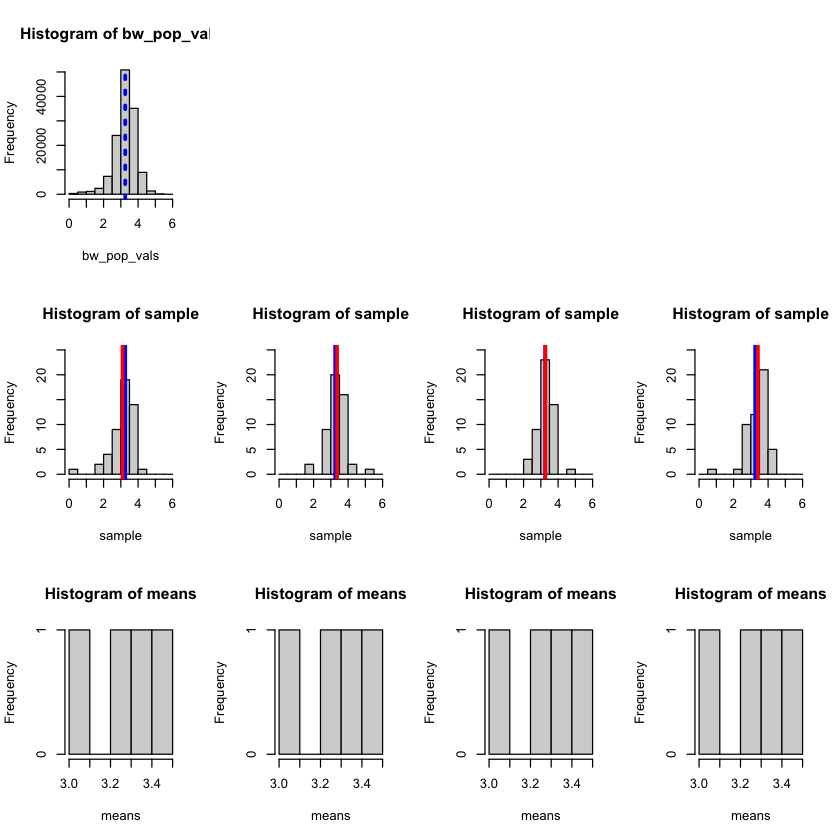

In [4]:
n_samples <- 4
row_2_start <- 2
row_3_start <- row_2_start + n_samples
layout_matrix <- rbind(c(1, numeric(n_samples - 1)),
                       row_2_start:(row_2_start + n_samples - 1),
                       row_3_start:(row_3_start + n_samples - 1))
layout(layout_matrix)
hist(bw_pop_vals)
abline(v = pop_mean, col = "blue", lwd = 3, lty = 3)
means <- numeric(n_samples)
breaks <- seq(0, 6, 0.5)
for (i in 1:n_samples) {
    sample <- sample(bw_pop_vals, size=50)
    sample_mean <- mean(sample)
    hist(sample, breaks=breaks, ylim=c(0, 25))
    abline(v = pop_mean, col = "blue", lwd = 3)
    abline(v = sample_mean, col = "red", lwd = 3)
    means[i] <- sample_mean
}
for (i in 1:n_samples) {
    hist(means)
}

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2 3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


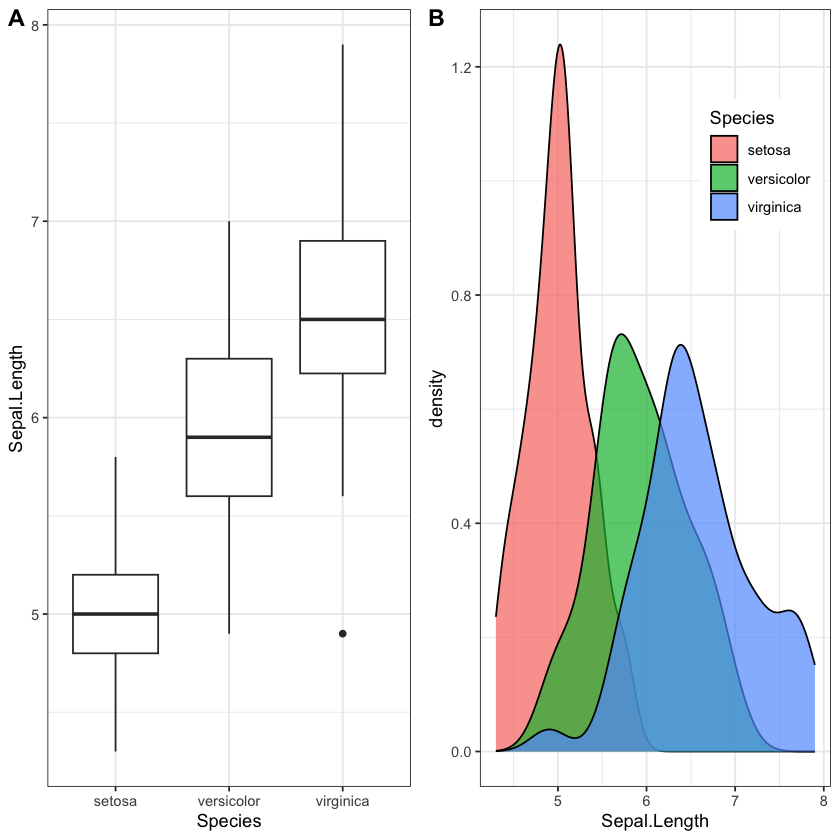

In [5]:

iris1 <- ggplot(iris, aes(x = Species, y = Sepal.Length)) +
  geom_boxplot() + theme_bw()

iris2 <- ggplot(iris, aes(x = Sepal.Length, fill = Species)) +
  geom_density(alpha = 0.7) + theme_bw() +
  theme(legend.position = c(0.8, 0.8))

plot_grid(iris1, iris2, labels = "AUTO")


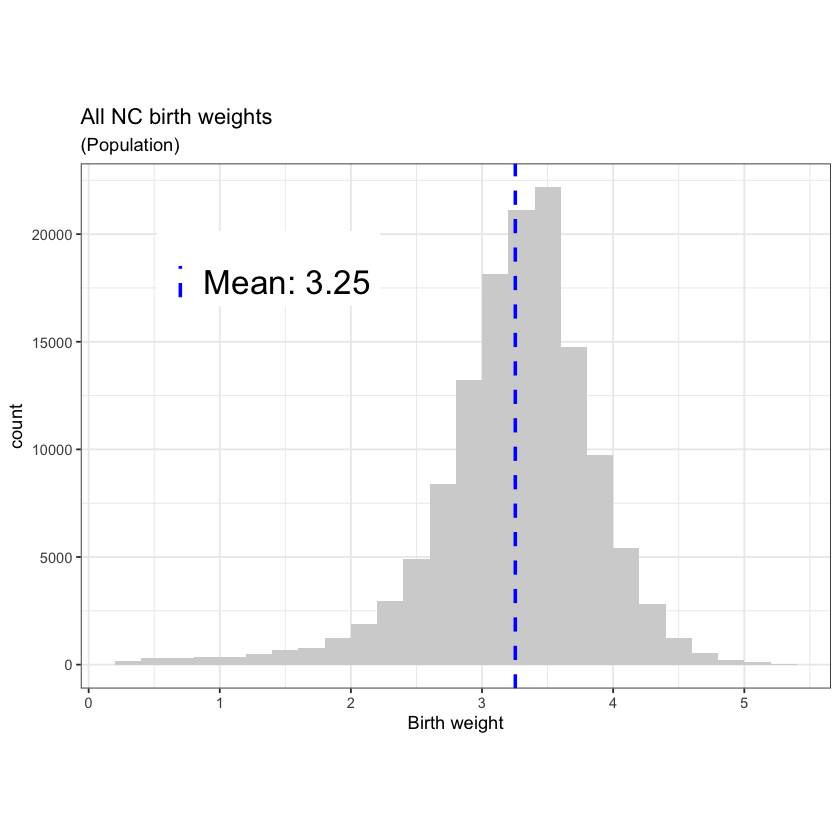

In [36]:
tbw <- theme_set(theme_bw())
breaks <- seq(0.2, 5.5, by=0.2)

plot_bw <- function(df) {
    if (nrow(df) > 1000) {  # Population
        fill_col <- 'light grey'
        mean_col <- 'blue'
    } else {  # Sample
        fill_col <- 'dark grey'
        mean_col <- 'red'
    }
    mean_val <- mean(df[['birth_weight']])
    label <- paste('Mean:', sprintf('%.2f', mean_val))
    p <- (
        ggplot(df, aes(birth_weight))
        + geom_histogram(fill = fill_col, breaks = breaks)
        + geom_vline(aes(xintercept=mean_val, colour=label),
                     linewidth=1,
                     linetype='dashed')
        + labs(x = "Birth weight", colour="")  # Reset colour for later.
        + scale_colour_manual(values=mean_col)
        + theme(legend.position=c(0.25, 0.8),
                legend.text = element_text(size=20),
                aspect.ratio=0.7)
    )
}

p <- plot_bw(bw_pop) + labs(
    title = 'All NC birth weights',
    subtitle = '(Population)')
p

In [37]:
ggsave('population.png', p)

Saving 7 x 7 in image


Note that one can get axis limits like this:

In [38]:
# https://stackoverflow.com/a/62819446
layer_scales(p)$y$get_limits()

[1]     0 22177

Saving 7 x 7 in image


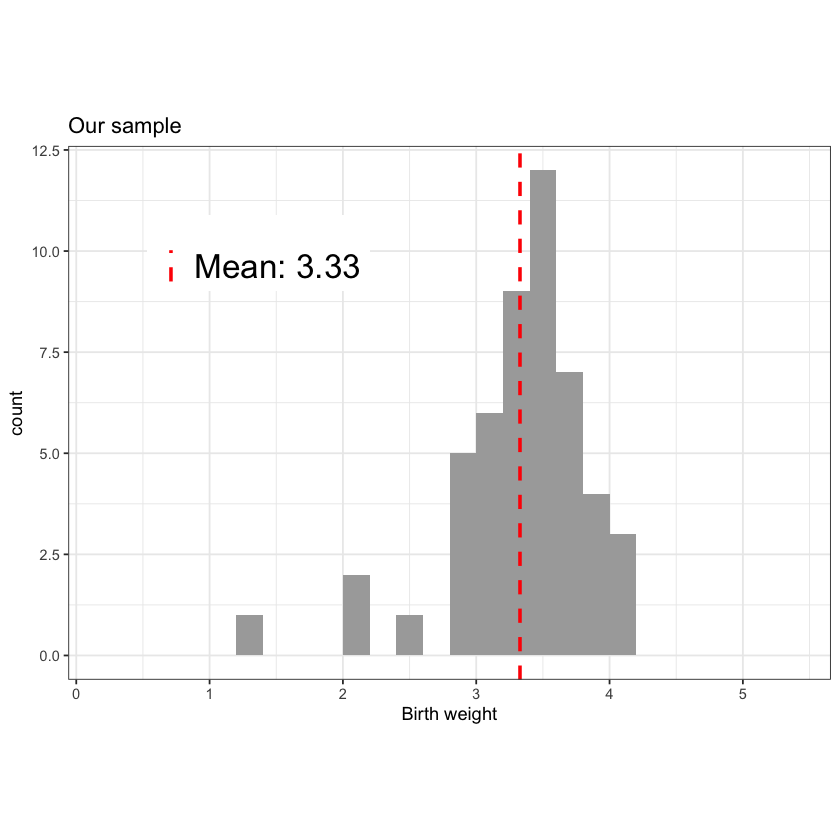

In [39]:
p <- plot_bw(bw_sample) + labs(
    title = 'Our sample')
ggsave('our_sample.png', p)
p

In [44]:
set.seed(1939)
n <- 50
sample2 <- sample_n(bw_pop, n)
p <- plot_bw(sample2) + labs(
    title = 'A second sample')
ggsave('sample2.png', p)
sample3 <- sample_n(bw_pop, n)
p <- plot_bw(sample3) + labs(
    title = 'A third sample')
ggsave('sample3.png', p)
sample4 <- sample_n(bw_pop, n)
p <- plot_bw(sample4) + labs(
    title = 'A fourth sample')
ggsave('sample4.png', p)

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


Consider <https://wilkelab.org/cowplot/articles/shared_legends.html>